# Bar and line graphs (ggplot2)

There is a basic grammar to all graphics production. In R‘s base graphics or in Excel, you feed ranges of data to a plot as x and y elements, then manipulate colors, scale dimensions and other parts of the graph as graphical elements or options.

ggplot2′s grammar makes a clear distinction between your data and what gets displayed on the screen or page. You feed ggplot2 your data, then apply a series of mappings and transformations to create a visual representation of that data. Even with base graphics or Excel we never really plot the data itself, we only create a representation; ggplot2 makes this distinction explicit. In addition, ggplot2′s structure makes it very easy to tweak a graph to look the way you want by adding mappings.




### Why learn GGPlot2?

* Prettier plots
* A systematic way of manipulating data, esp. when combined with plyr. Better than relying on a collection of recipes.
* Sophisticated graphs in a few lines which don't require updating if the data change.

### GGplot2:

* GG stands for Grammar of Graphics (Wilkinson, 2005).
* Provides a unified, statistically-oriented approach to graphical representation.
* Does so thanks to the use of more abstract objects than just raw graphical elements.


### A ggplot2 graph is built up from these  basic elements:
||||
|-|-|-|
|Data||The raw data that you want to plot|
|Geometries|geom_|The geometric shapes that will represent the data.|
|Aethetics|aes()|Aesthetics of the geometric and statistical objects, such as color, size, shape and position.|
|Scales|scale_|Maps between the data and the aesthetic dimensions, such as data range to plot width or factor values to colors|
|Statistical transformations|stat_|Statistical summaries of the data that can be plotted, such as quantiles, fitted curves (loess, linear models, etc.), sums and so on.|
|Coordinate systems|coord_|The transformation used for mapping data coordinates into the plane of the data rectangle.|
|Facets|facet_|The arrangement of the data into a grid of plots (also known as latticing, trellising or creating small multiples).|
|Visual Themes|theme|The overall visual defaults of a plot: background, grids, axe, default typeface, sizes, colors, etc.|

### Install R package ggplot2

In [2]:
install.packages("ggplot2", lib="/opt/conda/lib/R/library", repo="http://cran.us.r-project.org")
install.packages("gridExtra", lib="/opt/conda/lib/R/library", repo="http://cran.us.r-project.org")
library(ggplot2)
library(gridExtra)


The downloaded source packages are in
	‘/tmp/RtmpFvKbQE/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done



The downloaded source packages are in
	‘/tmp/RtmpFvKbQE/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Create example data frame 

In [3]:
dat <- data.frame(
  time = factor(c("Lunch","Dinner"), levels=c("Lunch","Dinner")),
  total_bill = c(14.89, 17.23)
)
dat
#>     time total_bill
#> 1  Lunch      14.89
#> 2 Dinner      17.23

# Load the ggplot2 package

,time,total_bill
1,Lunch,14.89
2,Dinner,17.23


### Very basic bar graphs

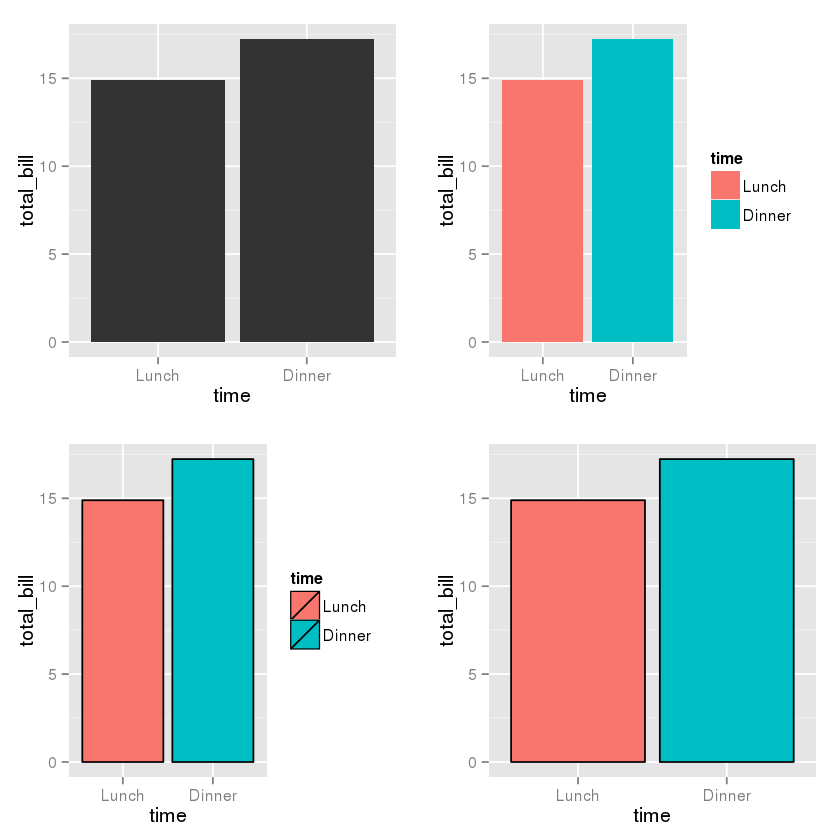

In [4]:

p1<-ggplot(data=dat, aes(x=time, y=total_bill)) +
    geom_bar(stat="identity")


# Map the time of day to different fill colors
p2<-ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) +
    geom_bar(stat="identity")

## This would have the same result as above
# ggplot(data=dat, aes(x=time, y=total_bill)) +
#    geom_bar(aes(fill=time), stat="identity")


# Add a black outline
p3<-ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) +
    geom_bar(colour="black", stat="identity")


# No legend, since the information is redundant
p4<-ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) +
    geom_bar(colour="black", stat="identity") +
    guides(fill=FALSE)
grid.arrange(p1, p2, p3, p4, nrow = 2, ncol =2, heights = c(0.65, 0.65))

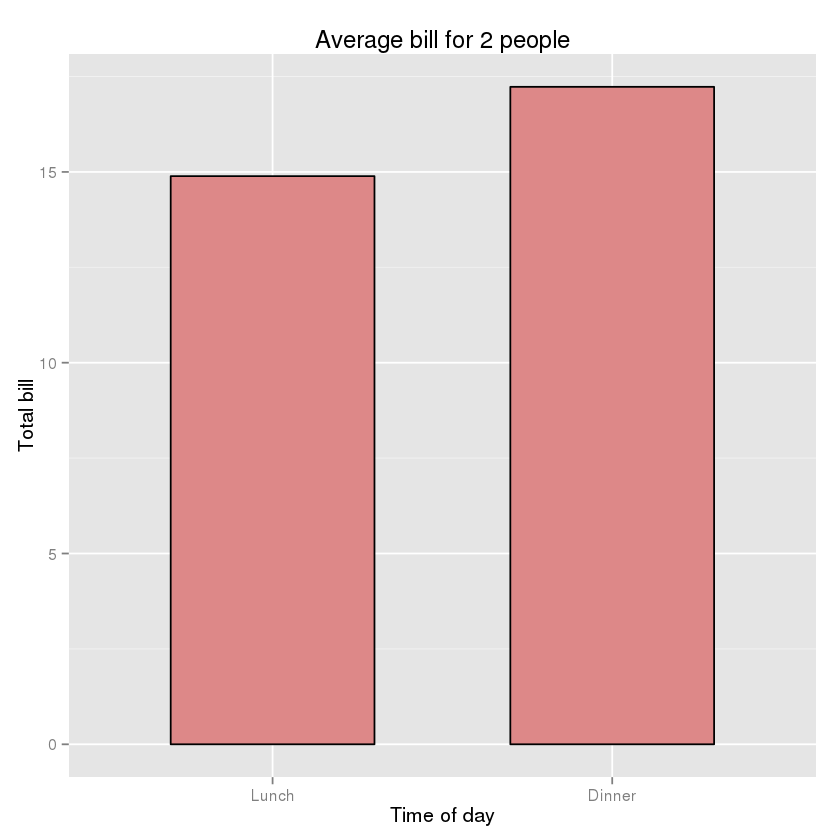

In [5]:
# Add title, narrower bars, fill color, and change axis labels
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) + 
    geom_bar(colour="black", fill="#DD8888", width=.6, stat="identity") + 
    guides(fill=FALSE) +
    xlab("Time of day") + ylab("Total bill") +
    ggtitle("Average bill for 2 people")

### Bar graphs of counts

In [ ]:
library(reshape2)
# Look at fist several rows
head(tips)
#>   total_bill  tip    sex smoker day   time size
#> 1      16.99 1.01 Female     No Sun Dinner    2
#> 2      10.34 1.66   Male     No Sun Dinner    3
#> 3      21.01 3.50   Male     No Sun Dinner    3
#> 4      23.68 3.31   Male     No Sun Dinner    2
#> 5      24.59 3.61 Female     No Sun Dinner    4
#> 6      25.29 4.71   Male     No Sun Dinner    4

In [ ]:
ggplot(data=tips, aes(x=tip))+geom_bar(stat="bin")
## Equivalent to this, since stat="bin" is the default:
# ggplot(data=tips, aes(x=day)) +
#    geom_bar()

### Line graph

In [ ]:
# Basic line graph
p5<-ggplot(data=dat, aes(x=time, y=total_bill, group=1)) +
    geom_line()
## This would have the same result as above
# ggplot(data=dat, aes(x=time, y=total_bill)) +
#     geom_line(aes(group=1))

# Add points
p6<-ggplot(data=dat, aes(x=time, y=total_bill, group=1)) +
    geom_line() +
    geom_point()

# Change color of both line and points
# Change line type and point type, and use thicker line and larger points
# Change points to circles with white fill
p7<-ggplot(data=dat, aes(x=time, y=total_bill, group=1)) + 
    geom_line(colour="red", linetype="dashed", size=1.5) + 
    geom_point(colour="red", size=4, shape=21, fill="white")
grid.arrange(p5, p6, p7, nrow = 2, ncol =2, heights = c(0.65, 0.65))

In [ ]:
# Change the y-range to go from 0 to the maximum value in the total_bill column,
# and change axis labels
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) +
    geom_line() +
    geom_point() +
    expand_limits(y=0) +
    xlab("Time of day") + ylab("Total bill") +
    ggtitle("Average bill for 2 people")

In [ ]:
dat1 <- data.frame(
    sex = factor(c("Female","Female","Male","Male")),
    time = factor(c("Lunch","Dinner","Lunch","Dinner"), levels=c("Lunch","Dinner")),
    total_bill = c(13.53, 16.81, 16.24, 17.42)
)
dat1
#>      sex   time total_bill
#> 1 Female  Lunch      13.53
#> 2 Female Dinner      16.81
#> 3   Male  Lunch      16.24
#> 4   Male Dinner      17.42

In [ ]:
# Stacked bar graph -- this is probably not what you want
p8<-ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity")

# Bar graph, time on x-axis, color fill grouped by sex -- use position_dodge()
p9<-ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge())

p10<-ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")

# Change colors
p11<-ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black") +
    scale_fill_manual(values=c("#999999", "#E69F00"))
grid.arrange(p8, p9, p10, p11, nrow = 2, ncol =2, heights = c(0.65, 0.65))

In [ ]:
# Bar graph, time on x-axis, color fill grouped by sex -- use position_dodge()
ggplot(data=dat1, aes(x=sex, y=total_bill, fill=time)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")

In [ ]:
# Basic line graph with points
p12<-ggplot(data=dat1, aes(x=time, y=total_bill, group=sex)) +
    geom_line() +
    geom_point()

# Map sex to color
p13<-ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, colour=sex)) +
    geom_line() +
    geom_point()

# Map sex to different point shape, and use larger points
p14<-ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex)) +
    geom_line() +
    geom_point()


# Use thicker lines and larger points, and hollow white-filled points
p15<-ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex)) + 
    geom_line(size=1.5) + 
    geom_point(size=3, fill="white") +
    scale_shape_manual(values=c(22,21))
grid.arrange(p12, p13, p14, p15, nrow = 2, ncol =2, heights = c(0.65, 0.65))

In [ ]:
ggplot(data=dat1, aes(x=sex, y=total_bill, group=time, shape=time, color=time)) +
    geom_line() +
    geom_point()

In [ ]:
# A bar graph
p16<-ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) + 
    geom_bar(colour="black", stat="identity",
             position=position_dodge(),
             size=.3) +                        # Thinner lines
    scale_fill_hue(name="Sex of payer") +      # Set legend title
    xlab("Time of day") + ylab("Total bill") + # Set axis labels
    ggtitle("Average bill for 2 people") +     # Set title
    theme_bw()


# A line graph
p17<-ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex, colour=sex)) + 
    geom_line(aes(linetype=sex), size=1) +     # Set linetype by sex
    geom_point(size=3, fill="white") +         # Use larger points, fill with white
    expand_limits(y=0) +                       # Set y range to include 0
    scale_colour_hue(name="Sex of payer",      # Set legend title
                     l=30)  +                  # Use darker colors (lightness=30)
    scale_shape_manual(name="Sex of payer",
                       values=c(22,21)) +      # Use points with a fill color
    scale_linetype_discrete(name="Sex of payer") +
    xlab("Time of day") + ylab("Total bill") + # Set axis labels
    ggtitle("Average bill for 2 people") +     # Set title
    theme_bw() +
    theme(legend.position=c(.7, .4))           # Position legend inside
                                               # This must go after theme_bw
grid.arrange(p16, p17, nrow = 1, ncol =2, heights = c(0.65))

In [ ]:
datn <- read.table(header=TRUE, text='
supp dose length
  OJ  0.5  13.23
  OJ  1.0  22.70
  OJ  2.0  26.06
  VC  0.5   7.98
  VC  1.0  16.77
  VC  2.0  26.14
')

In [ ]:
ggplot(data=datn, aes(x=dose, y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()

In [ ]:
# Copy the data frame and convert dose to a factor
datn2 <- datn
datn2$dose <- factor(datn2$dose)
p18<-ggplot(data=datn2, aes(x=dose, y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()

# Use the original data frame, but put factor() directly in the plot specification
p19<-ggplot(data=datn, aes(x=factor(dose), y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()
grid.arrange(p18, p19, nrow = 1, ncol =2, heights = c(0.65))

In [ ]:
# Use datn2 from above
p20<-ggplot(data=datn2, aes(x=dose, y=length, fill=supp)) +
    geom_bar(stat="identity", position=position_dodge())

# Use the original data frame, but put factor() directly in the plot specification
p21<-ggplot(data=datn, aes(x=factor(dose), y=length, fill=supp)) +
    geom_bar(stat="identity", position=position_dodge())
grid.arrange(p20, p21, nrow = 1, ncol =2, heights = c(0.65))